## Propagación de la afinidad

In [1]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [3]:
import matplotlib.pyplot as plt
from itertools import cycle

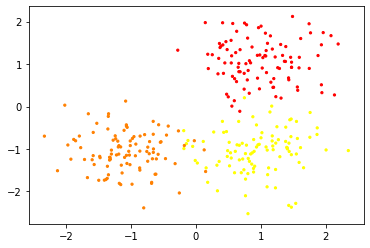

In [4]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap="autumn", s = 5)

In [5]:
af = AffinityPropagation(preference=-50).fit(X)

In [6]:
cluster_center_ids = af.cluster_centers_indices_

In [7]:
clust_labels = af.labels_

In [8]:
n_clust = len(cluster_center_ids)
n_clust

3

In [20]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    clust_labels = af.labels_
    
    print("Numero estimado de cluster: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
    print("Y-measurre: %0.3f"%metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Información mutua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    
    plt.figure(figsize=(16, 9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members,1], col + '.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor = col , markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0], x[0]], [clust_center[1], x[1]], col)
    
                                                        
    plt.title("Numero estimado de clusers %d:"%n_clust)
    plt.show()

Numero estimado de cluster: 3
Homogeneidad: 0.872
Completitud: 0.872
Y-measurre: 0.872
R2 ajustado: 0.912
Información mutua ajustada: 0.871
Coeficiente de la silueta: 0.735


C:\Users\l_jor\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


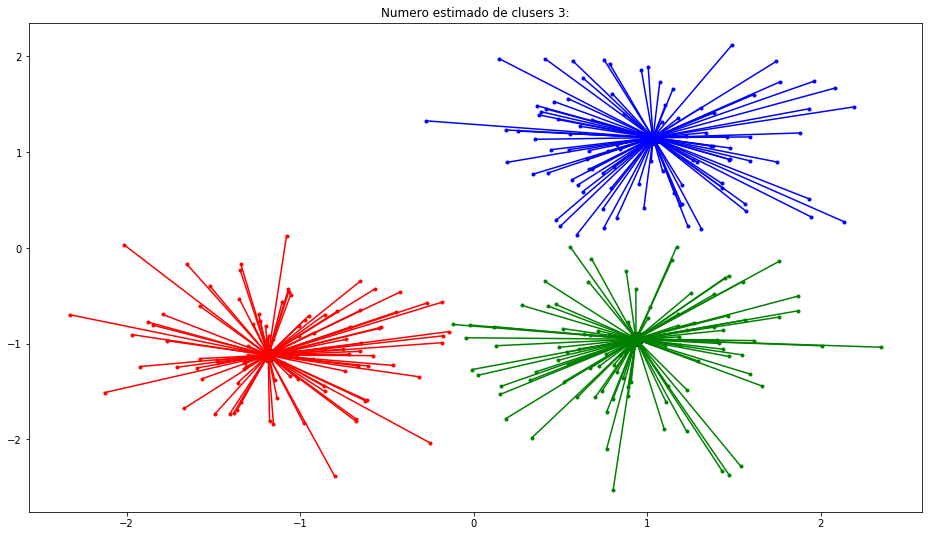

In [21]:
report_affinity_propagation(X)